![img](https://upload.wikimedia.org/wikipedia/commons/thumb/c/ca/Walmart_logo.svg/2560px-Walmart_logo.svg.png)

# project idea - Walmart
Evaluate store income from all USA and choose which one is the more apropriate to expand. It's necessary to analise the weekly sales of each one, calculate some important informations to awnser the constructive questions.

# dataset
Consists in weekly sales of 45 stores arround USA. It has a lot of promocional events thtroughout the year, mainly in the biggest ones, those are Super Bowl, Labor Day, Thanks Giving and Christmas. Those weeks have greater weights

[Dataset](https://www.kaggle.com/datasets/yasserh/walmart-dataset)

About this file
This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file WalmartStoresales. Within this file you will find the following fields:

Variable | Description
--- | ---
Store | the store number
Date | the week of sales
Weekly_Sales | sales for the given store
Holiday_Flag | whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
Temperature | Temperature on the day of sale
Fuel_Price | Cost of fuel in the region
CPI | Prevailing consumer price index
Unemployment | Prevailing unemployment rate

Variable | Description
--- | ---
Holiday Events
Super Bowl | 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
Labour Day | 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
Thanksgiving | 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
Christmas | 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

# constructive questions:
1. What is the average store's weelky sales?
2. Which atribute has greater correlation(positive or negative) with the sale's number?
3. Which store has the greatest sales? And how many weeks of the year it exceeded the period's average?
4. Make a chart with the maximum sales, the minimum sales and the average of all stores over time. Highlight the four main holidays.
5. Choose one of the stores to expand and justify.


# import library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import date, datetime

# introductory analysis

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/Walmart.csv', sep=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format = '%d-%m-%Y')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,6
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,9


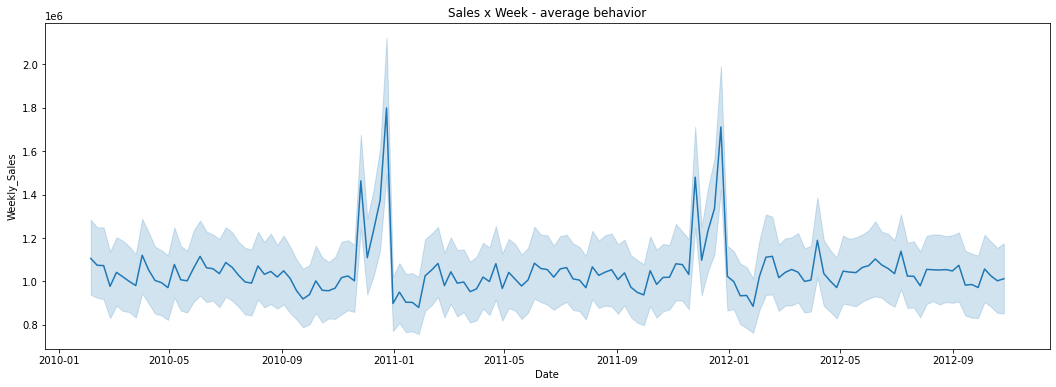

In [ ]:
# sales/time

plt.figure(figsize=(18,6))
sns.lineplot(data=df, x='Date', y='Weekly_Sales')
plt.title('Sales x Week - average behavior')
plt.show()

In [ ]:
df.describe(percentiles = [0.8, 0.9, 0.95, 0.99])

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,2010.965035,6.447552,25.818182
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,0.797019,3.238308,14.129201
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,2010.000000,1.000000,1.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,2011.000000,6.000000,26.000000
80%,36.200000,1.539977e+06,0.000000,77.782000,3.795000,214.694328,8.876000,2012.000000,10.000000,40.000000
90%,41.000000,1.887626e+06,0.000000,83.992000,3.916000,219.534098,9.863000,2012.000000,11.000000,45.000000
95%,43.000000,2.049179e+06,1.000000,87.663000,4.029000,221.926729,12.187000,2012.000000,12.000000,49.000000
99%,45.000000,2.404035e+06,1.000000,93.190000,4.203000,225.470151,14.180000,2012.000000,12.000000,52.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,2012.000000,12.000000,52.000000


In [ ]:
df.groupby(by='Store').mean().sort_values(by='Weekly_Sales', ascending = False).head()

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
Store,,,,,,,,,
20,2.107677e+06,0.06993,55.451399,3.417608,209.038131,7.371413,2010.965035,6.447552,25.818182
4,2.094713e+06,0.06993,62.253357,3.216972,128.679669,5.964692,2010.965035,6.447552,25.818182
14,2.020978e+06,0.06993,57.790979,3.417608,186.285678,8.648748,2010.965035,6.447552,25.818182
13,2.003620e+06,0.06993,53.697133,3.286147,128.679669,7.001825,2010.965035,6.447552,25.818182
2,1.925751e+06,0.06993,68.216364,3.219699,215.646311,7.623846,2010.965035,6.447552,25.818182


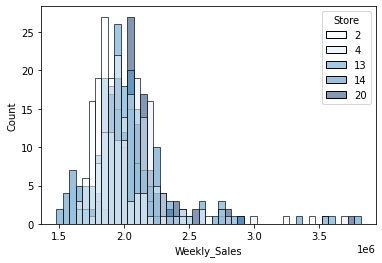

In [ ]:
sns.histplot(data=df[df.Store.isin([20,4,14,13,2])], x='Weekly_Sales', hue='Store', palette='Blues')

## 1. What is the average store's weelky sales?

In [ ]:
# copy df
df_group = df.copy()
    
# groupby
df_group = df.groupby(by='Store').mean()

# sortvalues
df_group = df_group.sort_values(by = 'Weekly_Sales', ascending = False)

df_group

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
Store,,,,,,,,,
20,2.107677e+06,0.06993,55.451399,3.417608,209.038131,7.371413,2010.965035,6.447552,25.818182
4,2.094713e+06,0.06993,62.253357,3.216972,128.679669,5.964692,2010.965035,6.447552,25.818182
14,2.020978e+06,0.06993,57.790979,3.417608,186.285678,8.648748,2010.965035,6.447552,25.818182
13,2.003620e+06,0.06993,53.697133,3.286147,128.679669,7.001825,2010.965035,6.447552,25.818182
2,1.925751e+06,0.06993,68.216364,3.219699,215.646311,7.623846,2010.965035,6.447552,25.818182
10,1.899425e+06,0.06993,72.241189,3.575923,128.679669,8.362965,2010.965035,6.447552,25.818182
27,1.775216e+06,0.06993,57.311119,3.578294,139.011284,8.001748,2010.965035,6.447552,25.818182
6,1.564728e+06,0.06993,69.700000,3.219699,217.553197,6.606902,2010.965035,6.447552,25.818182
1,1.555264e+06,0.06993,68.306783,3.219699,215.996892,7.610420,2010.965035,6.447552,25.818182


In [ ]:
# top 5 stores - sales/time

top_5 = df_group.index.to_list()[:5]
top_5

[20, 4, 14, 13, 2]

/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:514: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:529: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)


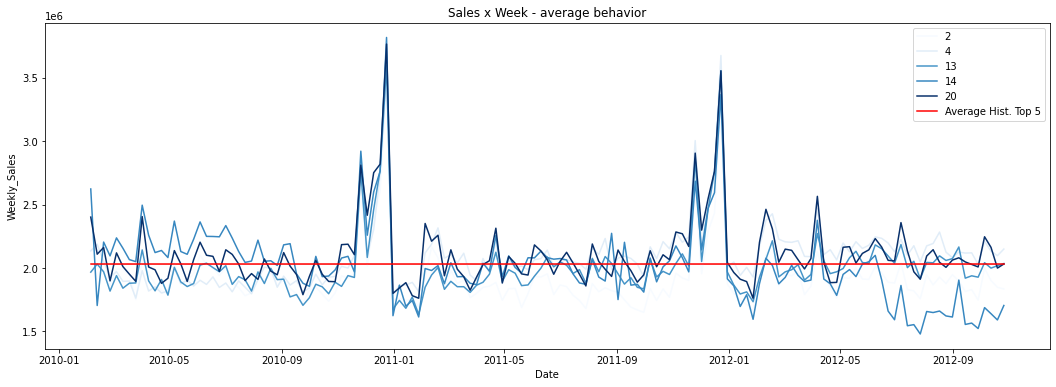

In [ ]:
plt.figure(figsize=(18,6))
sns.lineplot(data=df[df.Store.isin(top_5)], x='Date', y='Weekly_Sales', hue = 'Store', palette = 'Blues')
sns.lineplot(data=df[df.Store.isin(top_5)], x='Date', y=df[df.Store.isin(top_5)]['Weekly_Sales'].mean(), c = 'Red', label = 'Average Hist. Top 5')
plt.title('Sales x Week - average behavior')
plt.show()

## 2. Which atribute has greater correlation(positive or negative) with the sale's number?

In [ ]:
df.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531,3.474318e-12,2.910676e-15,3.106283e-15
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176,-1.837754e-02,7.614332e-02,7.421127e-02
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960,-5.678257e-02,1.229958e-01,1.277427e-01
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158,6.426923e-02,2.358618e-01,2.361833e-01
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684,7.794703e-01,-4.215590e-02,-3.240300e-02
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020,7.479573e-02,4.979672e-03,6.041530e-03
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000,-2.418135e-01,-1.274559e-02,-1.589158e-02
Year,3.474318e-12,-0.018378,-5.678257e-02,0.064269,0.779470,0.074796,-0.241813,1.000000e+00,-1.944645e-01,-1.819189e-01
Month,2.910676e-15,0.076143,1.229958e-01,0.235862,-0.042156,0.004980,-0.012746,-1.944645e-01,1.000000e+00,9.959843e-01
Week,3.106283e-15,0.074211,1.277427e-01,0.236183,-0.032403,0.006042,-0.015892,-1.819189e-01,9.959843e-01,1.000000e+00


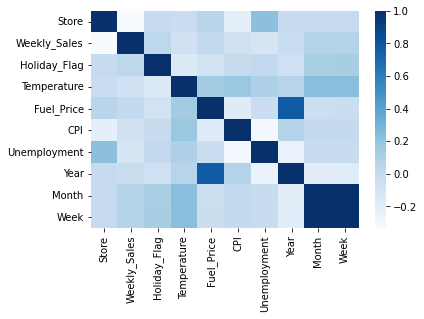

In [ ]:
sns.heatmap(df.corr(), cmap='Blues')

In [ ]:
# Awnser: Unemployment wit a -0.106 correlation. And Store is not a parameter because it's the ID, so each one has your own and it doesn't interfer in the sales.
print(df.corr()['Weekly_Sales'].sort_values())

Store          -0.335332
Unemployment   -0.106176
CPI            -0.072634
Temperature    -0.063810
Year           -0.018378
Fuel_Price      0.009464
Holiday_Flag    0.036891
Week            0.074211
Month           0.076143
Weekly_Sales    1.000000
Name: Weekly_Sales, dtype: float64


## 3 - Which store has the greatest sales? And how many weeks of the year it exceeded the period's average?

In [ ]:
df_great_sales = df.copy()

df_20 = df_great_sales[df_great_sales.Store == 20]

mean_20 = df_great_sales[df_great_sales.Store == 20]['Weekly_Sales'].mean()

mean_20

2107676.8703496507

In [ ]:
# in how many weeks did it sell
df_20.shape[0]

143

In [ ]:
# in how many weeks did it sell above the average
df_20[df_20.Weekly_Sales >= mean_20].shape[0]

52

In [ ]:
df_20[df_20.Weekly_Sales >= mean_20].shape[0]/ df_20.shape[0] * 100

36.36363636363637

/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:514: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:529: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)


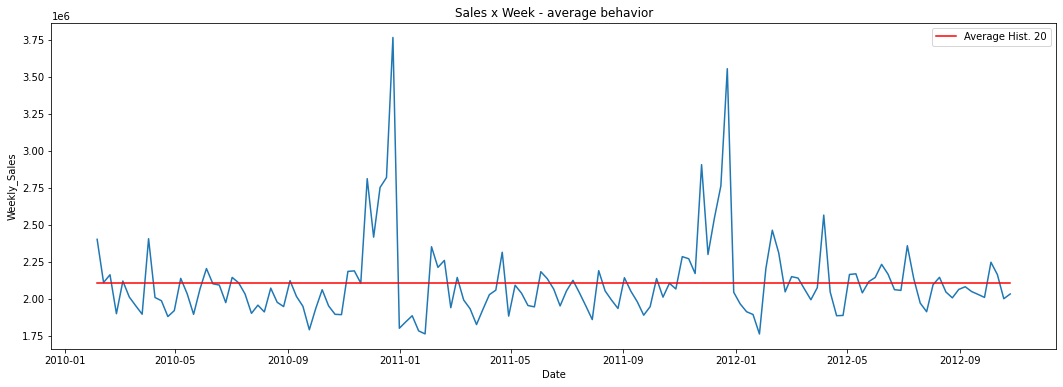

In [ ]:
plt.figure(figsize=(18,6))
sns.lineplot(data=df[df.Store ==20], x='Date', y='Weekly_Sales')
sns.lineplot(data=df[df.Store ==20], x='Date', y=df[df.Store == 20]['Weekly_Sales'].mean(), c = 'Red', label = 'Average Hist. 20')
plt.title('Sales x Week - average behavior')
plt.show()

## 4 - Make a chart with the maximum sales, the minimum sales and the average of all stores over time. Highlight the four main holidays.

In [ ]:
# holidays

holiday_dict = {
  'Super Bowl' : ['12/02/10', '11/02/11', '10/02/12', '8/02/13'],
  'Labour Day' : ['10/09/10', '9/09/11', '7/09/12', '6/09/13'],
  'Thanksgiving' : ['26/11/10', '25/11/11', '23/11/12', '29/11/13'],
  'Christmas' :['31/12/10', '30/12/11', '28/12/12', '27/12/13']
}

In [ ]:
# demonstrative of how to access the dict data
for i in holiday_dict.keys():
  print(i)
  for j in holiday_dict[i]:
    print(j)

Super Bowl
12/02/10
11/02/11
10/02/12
8/02/13
Labour Day
10/09/10
9/09/11
7/09/12
6/09/13
Thanksgiving
26/11/10
25/11/11
23/11/12
29/11/13
Christmas
31/12/10
30/12/11
28/12/12
27/12/13


In [ ]:
#  getting the holiday name
for i in holiday_dict.keys():
  #print(i)
  for j in holiday_dict[i]:
    print(f'{i} - {j[-2:]}')

Super Bowl - 10
Super Bowl - 11
Super Bowl - 12
Super Bowl - 13
Labour Day - 10
Labour Day - 11
Labour Day - 12
Labour Day - 13
Thanksgiving - 10
Thanksgiving - 11
Thanksgiving - 12
Thanksgiving - 13
Christmas - 10
Christmas - 11
Christmas - 12
Christmas - 13


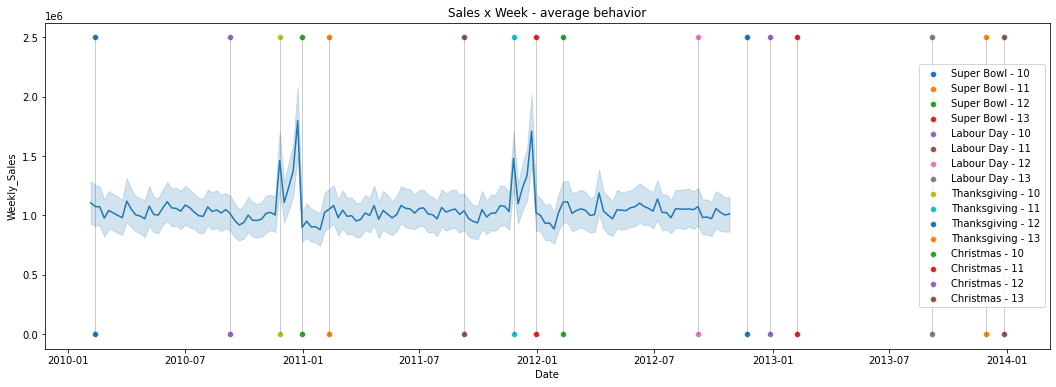

In [ ]:
# Graphic analysis - Sales/Time

plt.figure(figsize = (18,6))
sns.lineplot(data=df, x = 'Date', y = 'Weekly_Sales')

for i in holiday_dict.keys():
  #print(i)
  for j in holiday_dict[i]:
    #print(j)

    #format date holiday - 07/0912
    date_target = datetime.strptime(j, '%d/%m/%y')
    
    sns.scatterplot(x=[date_target, date_target],
                    y = [0, 2.5*10**6], label = f'{i} - {j[-2:]}')
    sns.lineplot(x=[date_target, date_target],
                    y = [0, 2.5*10**6], linestyle = '--', color='black')


plt.title('Sales x Week - average behavior')
plt.show()

## 5. Choose one of the stores to expand and justify.

The store that has more week sales above the average is the one that has the biggest historical income

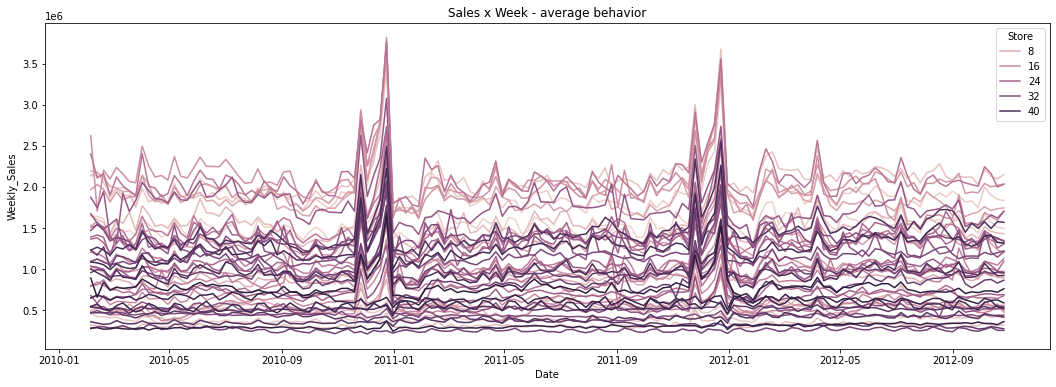

In [ ]:
# sales/time

plt.figure(figsize=(18,6))
sns.lineplot(data=df, x='Date', y='Weekly_Sales', hue='Store')
plt.title('Sales x Week - average behavior')
plt.show()

In [ ]:
# df copy
df_mean = df.copy()

# groupby
df_mean = df_mean.groupby('Store', as_index = False).mean()

# selection
df_mean = df_mean[['Store', 'Weekly_Sales']]
df_mean

,Store,Weekly_Sales
0,1,1.555264e+06
1,2,1.925751e+06
2,3,4.027044e+05
3,4,2.094713e+06
4,5,3.180118e+05
5,6,1.564728e+06
6,7,5.706173e+05
7,8,9.087495e+05
8,9,5.439806e+05
9,10,1.899425e+06


In [ ]:
aux_list =  []
aux_list_got = []

for i in df_mean.Store:
  total = df[df.Store == i].shape[0]
  aux_list.append(total)

  got = df[(df.Store == i) & (df.Weekly_Sales >= df_mean.iloc[i-1,1])].shape[0]

  aux_list_got.append(got)

In [ ]:
df_mean['Total'] = aux_list
df_mean['Got'] = aux_list_got
df_mean['Perc %'] = df_mean['Got']/df_mean['Total'] * 100

df_mean.sort_values(by = 'Perc %', ascending = False, inplace = True)

df_mean

,Store,Weekly_Sales,Total,Got,Perc %
42,43,6.333247e+05,143,73,51.048951
41,42,5.564039e+05,143,71,49.650350
35,36,3.735120e+05,143,71,49.650350
36,37,5.189003e+05,143,69,48.251748
37,38,3.857317e+05,143,68,47.552448
29,30,4.385796e+05,143,68,47.552448
32,33,2.598617e+05,143,67,46.853147
25,26,1.002912e+06,143,67,46.853147
13,14,2.020978e+06,143,66,46.153846
43,44,3.027489e+05,143,66,46.153846


/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:514: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:529: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)


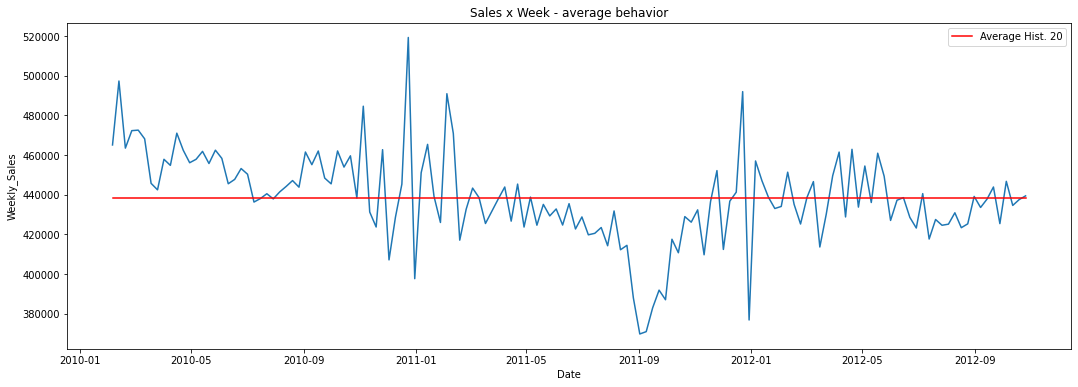

In [47]:
plt.figure(figsize=(18,6))
sns.lineplot(data=df[df.Store ==30], x='Date', y='Weekly_Sales')
sns.lineplot(data=df[df.Store ==30], x='Date', y=df[df.Store == 30]['Weekly_Sales'].mean(), c = 'Red', label = 'Average Hist. 20')
plt.title('Sales x Week - average behavior')
plt.show()